### Perform ‘ Data Analysis’ on dataset ‘Indian Premier League’.
#### As a sports analyst, find out the Different type of  Possible Analysis you able to make.
##### like most successful teams, players and factors contributing win or loss of a team etc.

Link to Datasets :- https://www.kaggle.com/nowke9/ipldata

#### DON'T COPY FROM PUBLIC NOTEBOOK PRESENT IN KAGGLE 
#### You Have to Define You'r Own Method

###### Example :-

#### Year In Which Ipl is played

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

matches.season.unique()

In [4]:
def Season():
    season = []
    for i in matches.season.values:
        season.append(i)
    return set(season)
Season()

{2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019}

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [37]:
matches['city'].fillna(method="ffill",inplace=True)
matches['winner'].fillna(method="ffill",inplace=True)
matches['player_of_match'].fillna(method="ffill",inplace=True)


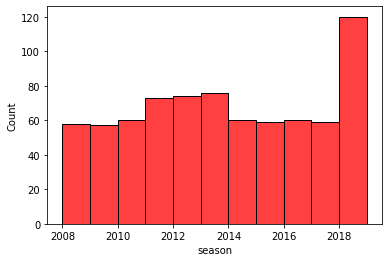

In [ ]:
sb.histplot(data=matches['season'],color='red')

In [24]:
toss_win_match_win = 0
not_win=0
for i in range(len(matches)):
  if (matches['toss_winner'][i]==matches['winner'][i]):
    toss_win_match_win+=1
  else:
    not_win+=1
toss_win_match_win , not_win

(393, 363)

Team which wins the toss are more likely to win the match

In [34]:
home_win = 0
nohome_win=0
city=matches['winner']
for i in range(len(matches)):
  if matches['city'][i] in city[i].split():
     home_win+=1
  else:
     nohome_win+=1
home_win , nohome_win

(240, 516)

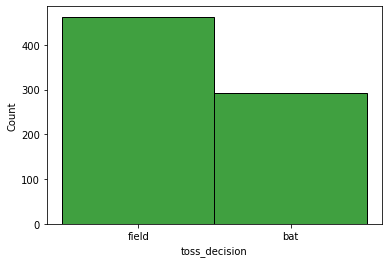

In [36]:
sb.histplot(matches['toss_decision'],color='Green')

toss winners are likely to choose fielding first

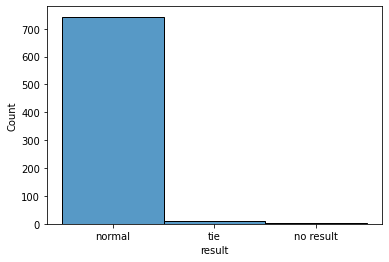

In [41]:
sb.histplot(matches['result'])

match tie and no result is very less as compared to normal

In [45]:
toss_win_dl = 0
win_dl=0
for i in range(len(matches)):
  if (matches['toss_winner'][i]==matches['winner'][i]) and matches['dl_applied'][i]>0:
     toss_win_dl+=1
  else:
     win_dl+=1
toss_win_dl , win_dl

(10, 746)

those who win toss are less likely to win match if DL is applied

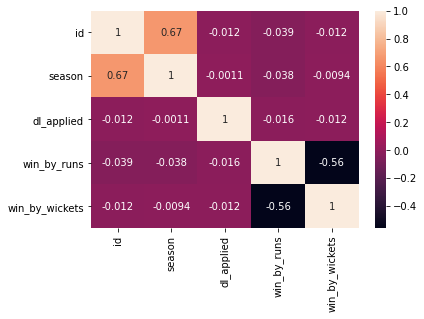

In [46]:
sb.heatmap(matches.corr(),annot=True)

correlation between all the columns in the table